In [26]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Путь относительно папки notebooks
data_path = Path("..") / "data" / "raw" / "used_cars.csv"
print(data_path)

df = pd.read_csv(data_path)
df.shape, df.columns.tolist()

../data/raw/used_cars.csv


((4009, 12),
 ['brand',
  'model',
  'model_year',
  'milage',
  'fuel_type',
  'engine',
  'transmission',
  'ext_col',
  'int_col',
  'accident',
  'clean_title',
  'price'])

In [3]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [5]:
df.describe(include="all")

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,4009,4009,4009.000000,4009,3839,4009,4009,4009,4009,3896,3413,4009
unique,57,1898,NaN,2818,7,1146,62,319,156,2,1,1569
top,Ford,M3 Base,NaN,"110,000 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,A/T,Black,Black,None reported,Yes,"$15,000"
freq,386,30,NaN,16,3309,52,1037,905,2025,2910,3413,39
mean,NaN,NaN,2015.515590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,6.104816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1974.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['price_num'] = (
    df['price']
    .str.replace('$', '', regex=False)   
    .str.replace(',', '', regex=False) 
    .str.strip()                        
    .astype('float64')           
)

df[['price', 'price_num']].head(10)

,price,price_num
0,"$10,300",10300.0
1,"$38,005",38005.0
2,"$54,598",54598.0
3,"$15,500",15500.0
4,"$34,999",34999.0
5,"$14,798",14798.0
6,"$31,000",31000.0
7,"$7,300",7300.0
8,"$41,927",41927.0
9,"$69,950",69950.0


In [8]:
df['milage_num'] = (
    df['milage']
    .str.replace('mi.', '', regex=False)
    .str.replace('mi', '', regex=False)  
    .str.replace(',', '', regex=False)    
    .str.strip()                        
    .astype('float64')          
)

df[['milage', 'milage_num']].head(10)

,milage,milage_num
0,"51,000 mi.",51000.0
1,"34,742 mi.",34742.0
2,"22,372 mi.",22372.0
3,"88,900 mi.",88900.0
4,"9,835 mi.",9835.0
5,"136,397 mi.",136397.0
6,"84,000 mi.",84000.0
7,"242,000 mi.",242000.0
8,"23,436 mi.",23436.0
9,"34,000 mi.",34000.0


In [9]:
df[['price_num', 'milage_num']].isna().mean()

price_num     0.0
milage_num    0.0
dtype: float64

In [11]:
pd.options.display.float_format = '{:.2f}'.format

df[['price_num', 'milage_num', 'model_year']].describe()

,price_num,milage_num,model_year
count,4009.00,4009.00,4009.00
mean,44553.19,64717.55,2015.52
std,78710.64,52296.60,6.10
min,2000.00,100.00,1974.00
25%,17200.00,23044.00,2012.00
50%,31000.00,52775.00,2017.00
75%,49990.00,94100.00,2020.00
max,2954083.00,405000.00,2024.00


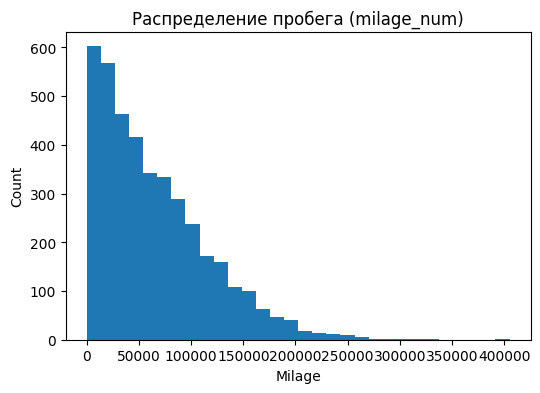

In [15]:
import matplotlib.pyplot as plt

# пробега
plt.figure(figsize=(6, 4))
plt.hist(df['milage_num'], bins=30)
plt.xlabel('Milage')
plt.ylabel('Count')
plt.title('Распределение пробега (milage_num)')
plt.show()

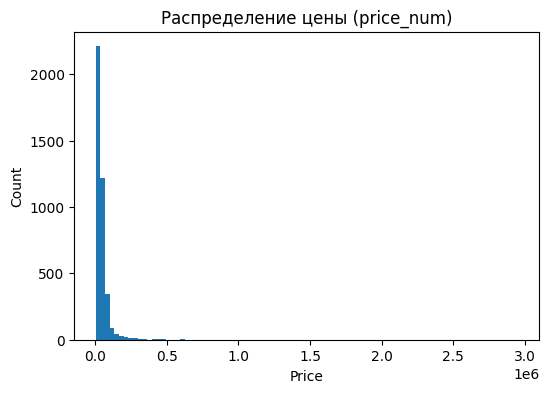

In [18]:
# цены
plt.figure(figsize=(6, 4))
plt.hist(df['price_num'], bins=90)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Распределение цены (price_num)')
plt.show()

In [19]:
price_quantiles = df['price_num'].quantile([0.01, 0.05, 0.5, 0.95, 0.99])
milage_quantiles = df['milage_num'].quantile([0.01, 0.05, 0.5, 0.95, 0.99])

price_quantiles, milage_quantiles

(0.01     4000.00
 0.05     6996.60
 0.50    31000.00
 0.95   111600.00
 0.99   272713.28
 Name: price_num, dtype: float64,
 0.01      634.68
 0.05     3541.20
 0.50    52775.00
 0.95   165000.00
 0.99   222428.00
 Name: milage_num, dtype: float64)

In [20]:
p_low, p_high = df['price_num'].quantile([0.01, 0.99])
m_low, m_high = df['milage_num'].quantile([0.01, 0.99])

# Фильтрация по этим порогам
df_clean = df[
    (df['price_num'] >= p_low) & (df['price_num'] <= p_high) &
    (df['milage_num'] >= m_low) & (df['milage_num'] <= m_high)
].reset_index(drop=True)

df.shape, df_clean.shape

((4009, 14), (3864, 14))

In [22]:
df_model = df_clean.copy()

target_col = 'price_num'
numeric_features = ['model_year', 'milage_num']

categorical_features = [
    'brand',
    'model',
    'fuel_type',
    'engine',       
    'transmission',
    'ext_col',
    'int_col',
    'accident',
    'clean_title'
]

X = df_model[numeric_features + categorical_features].copy()
y = df_model[target_col].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    
    random_state=42,   
    shuffle=True         # перемешиваем
)

X_train.shape, X_test.shape

((3091, 11), (773, 11))

In [24]:
# Преобразователь признаков
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        (
            "cat",
            OneHotEncoder(
                handle_unknown="ignore",  # игнорируем новые категории на тесте/в проде
                sparse_output=False       # сразу получаем обычный numpy-массив
            ),
            categorical_features,
        ),
    ]
)

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,  
    random_state=42,
    n_jobs=-1            # использовать все ядра процессора
)

model_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", rf),
    ]
)

model_pipeline

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [25]:
%%time

model_pipeline.fit(X_train, y_train)

CPU times: user 31.7 s, sys: 244 ms, total: 31.9 s
Wall time: 3.04 s


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [31]:
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Сначала считаем MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Потом берём корень -> RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Остальные метрики как раньше
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

metrics = {
    "mae_train": round(mae_train, 2),
    "rmse_train": round(rmse_train, 2),
    "r2_train": round(r2_train, 4),
    "mae_test": round(mae_test, 2),
    "rmse_test": round(rmse_test, 2),
    "r2_test": round(r2_test, 4),
}
metrics

{'mae_train': 3815.0,
 'rmse_train': np.float64(6834.5),
 'r2_train': 0.9621,
 'mae_test': 10159.71,
 'rmse_test': np.float64(16669.48),
 'r2_test': 0.7158}